# Bow Image Classification | ResNet50V2

### *Course Project - Deep Learning*
#### `Part 1A | Transfer Learning`

**Author:** Sarang Galada<br>
**School:** School of Computing & Data Science, Sai University<br>
**Email ID:** sarang.g-25@scds.saiuniversity.edu.in<br>
**Date created:** 08/12/2023<br><br>
**Description:** Classification of Bow (weapon) images into 5 types using Transfer Learning and Fine Tuning

*   *Problem*: `Image Classification`
*   *Dataset*: `Bow Images`
*   *Model*: `ResNet50V2`
*   *Key library used*: `TensorFlow Keras`

## Downloading and preparing the data

In [1]:
# Import required libraries

import numpy as np
np.random.seed(42)

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import os
import glob
import PIL
from PIL import Image

2.15.0


### From scratch

In [ ]:
# Download and unzip the raw data from a Google Drive directory
# Data: Image files of various Bows (weapon)

!gdown 1mUVfGSEDLYwKt_7fnPk0jSNI44lbcKwu
!unzip Bow_Category.zip

In [ ]:
# Inspect the subfolders
os.listdir("Bow_Category")

['Crossbow', 'Kyudo Bow', 'Traditional Recurve Bow', 'Longbow', 'Compound Bow']

In [ ]:
# Peek into the raw image files
imgFiles = glob.glob("Bow_Category/*/*.jpg")
for items in imgFiles[:5]:
  print(items)

Bow_Category/Crossbow/crossbow (34).jpg
Bow_Category/Crossbow/crossbow (65).jpg
Bow_Category/Crossbow/crossbow (67).jpg
Bow_Category/Crossbow/crossbow (42).jpg
Bow_Category/Crossbow/crossbow (70).jpg


The raw data folder contains 5 subfolders, one for each type of Bow. To prepare the dataset keeping in mind the requirements of the `ResNet50V2` model, we must implement the following:
1. Convert all images to 3-channel RGB images
2. Resize images to `224`x`224` pixels
3. Scale pixel values to -1 to +1 range (with in-built Resnet preprocess function)
4. Attach a class label (ie. folder name) to each image

In [ ]:
## Preparing a dataset from the directories of image files

images = []
labels = []

# To check number of colour channels present in the images
c1, c3, c4 = 0, 0, 0

for fName in imgFiles:
  img = Image.open(fName)    # eg. Bow_Category/Kyudo Bow/kyudo (25).jpg
  shape = np.array(img).shape    # eg. (4588, 2593, 3)

  if(len(shape) == 2):    # If image is single-channel, convert to 3-channel RGB
    c1 += 1
    img = img.convert(mode='RGB')
  elif(shape[-1] == 4):    # If image is 4-channel, remove redundant 'transparency' channel (4th)
    c4 += 1
    img = Image.fromarray(np.array(img)[:, :, :3])
  else:
    c3 += 1

  img = img.resize((224,224))    # Resize images to make them appropriate to ResNet50V2 model when using Transfer Learning
  # img = np.array(img) / 255.0    # Normalize to range 0-1 (only scaling, not stretching)
  images.append(np.array(img))

  imgpath = fName.split("/")    # ['Bow_Category', 'Kyudo Bow', 'kyudo (25).jpg']
  label = imgpath[-2]    # 'Kyudo Bow'
  labels.append(label)

print(f"\n{c1} images had single colour channel")
print(f"{c3} images had 3 colour channels (RGB)")
print(f"{c4} images had 4 colour channels")

print("\nAll have been converted into normalized 3-channel RGB images of dimensions (224, 224, 3)")

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



39 images had single colour channel
762 images had 3 colour channels (RGB)
9 images had 4 colour channels

All have been converted into normalized 3-channel RGB images of dimensions (224, 224, 3)


In [ ]:
# Encoding the class labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(labels)

print(f"Classes: {le.classes_}") # Unique class names
print(f"Encoded: {set(y)}") # Unique classes (encoded)

X = keras.applications.resnet_v2.preprocess_input(np.array(images))
y = np.array(y)

print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Classes: ['Compound Bow' 'Crossbow' 'Kyudo Bow' 'Longbow' 'Traditional Recurve Bow']
Encoded: {0, 1, 2, 3, 4}

Shape of X: (810, 224, 224, 3)
Shape of y: (810,)


In [ ]:
print(f"-> Total number of images: {y.shape[0]}\n")
print("-> Class wise distribution:")
unique_classes, class_counts = np.unique(y, return_counts=True)
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls} ({le.classes_[cls]}): {count} images")

-> Total number of images: 810

-> Class wise distribution:
Class 0 (Compound Bow): 415 images
Class 1 (Crossbow): 100 images
Class 2 (Kyudo Bow): 26 images
Class 3 (Longbow): 41 images
Class 4 (Traditional Recurve Bow): 228 images


In [ ]:
# Split data into 75% training, 25% testing while maintaining proportions of each class
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify=y, random_state=42)
print(f"No. of training samples: {X_train.shape[0]}")
print(f"No. of testing samples: {X_test.shape[0]}")

No. of training samples: 607
No. of testing samples: 203


### If already prepared, load the datasets directly from Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# If already prepared, load the datasets directly from Drive

X_train = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/X_train.npy')
X_test = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/X_test.npy')
y_train = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/y_train.npy')
y_test = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/y_test.npy')

labels = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/labels.npy')

### Dataset overview

-> Total number of images: 810 \
-> Class-wise distribution: \
- Class 0 (Compound Bow): 415 images \
- Class 1 (Crossbow): 100 images \
- Class 2 (Kyudo Bow): 26 images \
- Class 3 (Longbow): 41 images \
- Class 4 (Traditional Recurve Bow): 228 images \

-> No. of training samples: 607 \
-> No. of testing samples: 203

## The ResNet50V2 model

102869336/102869336 [==============================] - 1s 0us/step


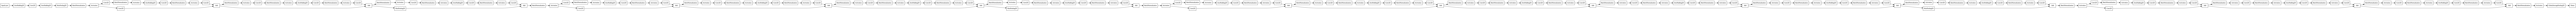

In [2]:
# Let us access and view the ResNet50V2 model architecture from Keras

ResNet50V2_model = keras.applications.ResNet50V2(include_top=True)

tf.keras.utils.plot_model(
    ResNet50V2_model,
    to_file='ResNet50V2_model.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96
)

In [ ]:
ResNet50V2_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

94668760/94668760 [==============================] - 1s 0us/step


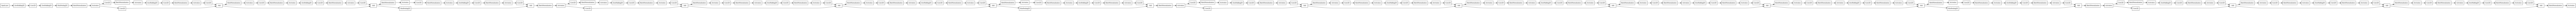

In [3]:
# But we want to adapt it to our use-case, so only require its Feature Extractor part

base_model = keras.applications.ResNet50V2(include_top=False, weights='imagenet')

tf.keras.utils.plot_model(
    base_model,
    to_file='base_model.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96
)

In [ ]:
# In Transfer Learning, we don't want to meddle with the Feature Extractor and use it as is,
# hence we freeze its weights before hand so that they are not updated during backpropagation

for layer in base_model.layers:
  layer.trainable = False

## Adding our own Classifier network - Transfer learning

The original `ResNet50V2` Classifier network:

- GlobalAveragePooling2D
- Dense (1000 units with softmax activation)

Our Classifier network for Bow image classification:

- GlobalAveragePooling2D
- BatchNormalization
- Dropout (25%)
- Dense (5 units with softmax activation)

In [ ]:
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.25)(x)
output_ = keras.layers.Dense(units=5, activation='softmax')(x)

model1_TL = keras.models.Model(inputs=[base_model.input], outputs=[output_])


## Compiling and training the model

In [ ]:
model1_TL.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_TL = [
             keras.callbacks.ModelCheckpoint("bestTL.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

history_TL = model1_TL.fit(x = X_train, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks_TL)

Epoch 1/10
35/35 [==============================] - 16s 206ms/step - loss: 0.8425 - accuracy: 0.7143 - val_loss: 0.4539 - val_accuracy: 0.8525
Epoch 2/10
35/35 [==============================] - 2s 68ms/step - loss: 0.2764 - accuracy: 0.9048 - val_loss: 0.4360 - val_accuracy: 0.8852
Epoch 3/10
35/35 [==============================] - 2s 56ms/step - loss: 0.2255 - accuracy: 0.9176 - val_loss: 0.3710 - val_accuracy: 0.8689
Epoch 4/10
35/35 [==============================] - 2s 56ms/step - loss: 0.1278 - accuracy: 0.9634 - val_loss: 0.3406 - val_accuracy: 0.8852
Epoch 5/10
35/35 [==============================] - 2s 71ms/step - loss: 0.1079 - accuracy: 0.9634 - val_loss: 0.3039 - val_accuracy: 0.9180
Epoch 6/10
35/35 [==============================] - 2s 58ms/step - loss: 0.1039 - accuracy: 0.9670 - val_loss: 0.3283 - val_accuracy: 0.9016
Epoch 7/10
35/35 [==============================] - 2s 55ms/step - loss: 0.0792 - accuracy: 0.9689 - val_loss: 0.3070 - val_accuracy: 0.9016
Epoch 8/10


## Visualising the model's training accuracy

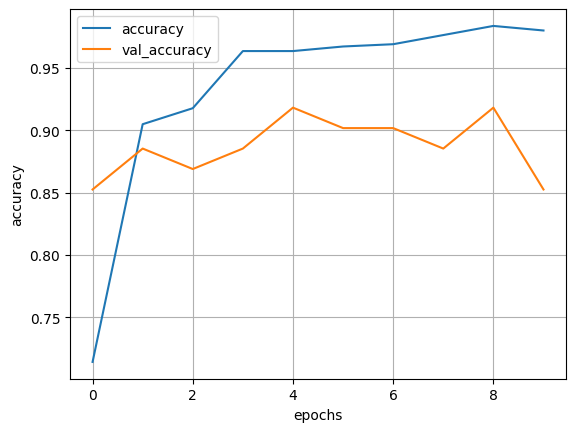

In [ ]:
progress = {k:v for k,v in history_TL.history.items() if k in ['accuracy', 'val_accuracy']}

pd.DataFrame(progress).plot()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

## Evaluating the model

In [ ]:
# Loading the model's best weights during training
model1_TL.load_weights("bestTL.h5")

# Test loss and test accuracy
testLoss_TL, testAccuracy_TL = model1_TL.evaluate(x = X_test, y = y_test, batch_size=16)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

13/13 [==============================] - 2s 178ms/step - loss: 0.2316 - accuracy: 0.9064
Test-loss: 0.231607, Test-accuracy: 0.906404


In [ ]:
# Making predictions on the test set

y_proba = model1_TL.predict(X_test)
y_pred = np.argmax(y_proba, axis=-1)
print(y_pred)

7/7 [==============================] - 4s 67ms/step
[0 0 4 4 0 0 0 0 4 4 0 0 1 0 0 0 4 1 0 1 0 4 0 0 0 4 0 0 0 0 0 1 4 0 0 0 0
 4 3 4 4 4 0 0 1 0 1 0 0 1 4 0 4 0 0 0 4 0 4 0 0 0 0 0 0 0 4 4 0 4 0 1 0 4
 0 0 0 0 0 0 4 4 4 0 0 2 4 4 4 0 4 0 1 4 4 4 4 0 0 3 1 0 0 4 0 0 1 0 0 0 4
 0 4 0 4 1 0 0 1 1 1 0 4 4 0 0 0 4 0 0 4 0 3 4 0 4 1 0 4 0 4 0 0 0 4 0 4 3
 0 0 4 0 4 4 0 1 4 0 0 0 4 1 0 4 0 4 0 4 0 4 0 1 4 0 0 4 4 4 0 0 1 0 0 4 4
 4 4 0 3 0 0 4 1 4 4 0 0 0 4 0 4 1 0]


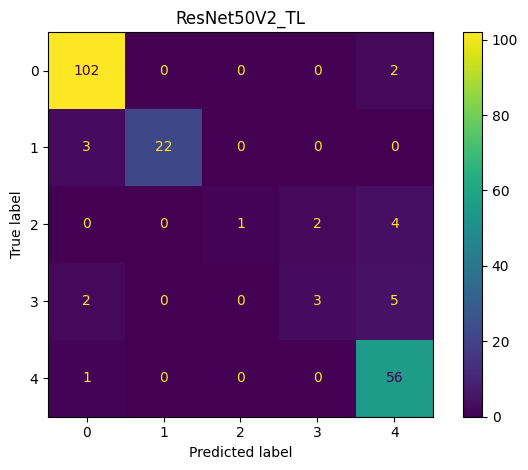

['Compound Bow' 'Crossbow' 'Kyudo Bow' 'Longbow' 'Traditional Recurve Bow']


In [ ]:
# Confusion Matrix of the model's predictions on the test data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred))
cm.plot()
plt.title("ResNet50V2_TL")
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfMat_ResNet50V2_TL.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

print(le.classes_)

In [ ]:
# Classification report

from sklearn.metrics import classification_report

clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       104
           1       1.00      0.88      0.94        25
           2       1.00      0.14      0.25         7
           3       0.60      0.30      0.40        10
           4       0.84      0.98      0.90        57

    accuracy                           0.91       203
   macro avg       0.88      0.66      0.69       203
weighted avg       0.91      0.91      0.89       203



## Saving the model and dataset
So that it can be later used for Fine Tuning

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Save the best performing model
model1_TL.save('/content/gdrive/MyDrive/Models/BowImageClassification/ResNet50V2_TransferLearning_BestModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
np.save('/content/gdrive/MyDrive/Models/BowImageClassification/X_train.npy', X_train)
np.save('/content/gdrive/MyDrive/Models/BowImageClassification/X_test.npy', X_test)
np.save('/content/gdrive/MyDrive/Models/BowImageClassification/y_train.npy', y_train)
np.save('/content/gdrive/MyDrive/Models/BowImageClassification/y_test.npy', y_test)

In [ ]:
labels = np.array(le.classes_)
np.save('/content/gdrive/MyDrive/Models/BowImageClassification/labels.npy', labels)